# Problem Statement
Use decision trees to prepare a model on fraud data                                      
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
### Data Description :
    Undergrad       : person is under graduated or not
    Marital.Status  : marital status of a person
    Taxable.Income  : Taxable income is the amount of how much tax an individual owes to the government 
    Work Experience : Work experience of an individual person
    Urban           : Whether that person belongs to urban area or not

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
raw_data = pd.read_csv('Fraud_check.csv')
raw_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Cleaning

In [4]:
raw_data['Taxable.Income'] = (raw_data['Taxable.Income'] <= 30000).map({True : 'Risky', False : 'Good'})
raw_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


# Exploratory Data Analysis

In [6]:
raw_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600,600.000000,600.000000,600
unique,2,3,2,NaN,NaN,2
top,YES,Single,Good,NaN,NaN,YES
freq,312,217,476,NaN,NaN,302
mean,NaN,NaN,NaN,108747.368333,15.558333,NaN
std,NaN,NaN,NaN,49850.075134,8.842147,NaN
min,NaN,NaN,NaN,25779.000000,0.000000,NaN
25%,NaN,NaN,NaN,66966.750000,8.000000,NaN
50%,NaN,NaN,NaN,106493.500000,15.000000,NaN
75%,NaN,NaN,NaN,150114.250000,24.000000,NaN


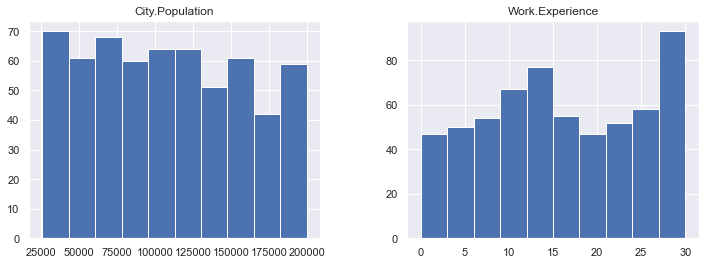

In [7]:
raw_data.hist(figsize=(12,4))
plt.show()

In [8]:
raw_data['Taxable.Income'].unique()

array(['Good', 'Risky'], dtype=object)

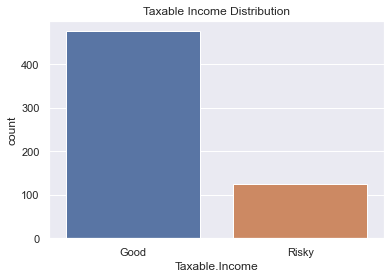

In [9]:
sns.countplot(x='Taxable.Income',y=None, data = raw_data)
plt.title('Taxable Income Distribution')
plt.show()

In [10]:
raw_data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

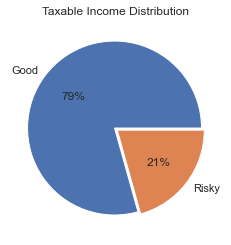

In [12]:
plt.pie(x =raw_data['Taxable.Income'].value_counts(),labels=['Good','Risky'],autopct='%1.0f%%',explode=[0.02,0.02])
plt.title('Taxable Income Distribution')
plt.show()

# Data Preprocessing

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [7]:
num_attribs = ['City.Population','Work.Experience']
cat_attribs = ['Undergrad','Marital.Status','Urban']
labels = ['Taxable.Income']
full_pipeline = ColumnTransformer([("num", StandardScaler(), num_attribs),
                                   ("cat", OneHotEncoder(drop='if_binary'), cat_attribs),
                                   ("tar", OneHotEncoder(drop='if_binary'), labels)
                                  ], sparse_threshold= 0)
data = full_pipeline.fit_transform(raw_data)

In [8]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7
0,-1.178521,-0.629143,0.0,0.0,0.0,1.0,1.0,0.0
1,0.508500,0.276370,1.0,1.0,0.0,0.0,1.0,0.0
2,1.033109,1.634639,0.0,0.0,1.0,0.0,1.0,0.0
3,1.696831,-0.063197,1.0,0.0,0.0,1.0,1.0,0.0
4,-1.630532,1.408261,0.0,0.0,1.0,0.0,0.0,0.0


# Defining Dependent and Independent Variables

In [9]:
x = data.drop(7, axis = 1)
y = data[7]

# Splitting the Data for Training and Testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 54)

# Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 15, n_jobs = -1, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, n_jobs=-1, random_state=42)

# Confusion Matrix and Classification Report

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[378,   1],
       [  6,  95]], dtype=int64)

In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       379
         1.0       0.99      0.94      0.96       101

    accuracy                           0.99       480
   macro avg       0.99      0.97      0.98       480
weighted avg       0.99      0.99      0.99       480



# Model Testing

In [14]:
y_test_pred = clf.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[92,  5],
       [23,  0]], dtype=int64)

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        97
         1.0       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120



# Hyper Parameter Tuning using GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                              param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,3,4,5,6],
                                          'n_estimators' : range(20,51)},
                             )
grid_search_cv.fit(x_train,y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}
0.7895833333333333


In [22]:
clf = RandomForestClassifier(criterion = 'gini', max_depth = 2, n_estimators = 20)

In [23]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20)

In [24]:
confusion_matrix(y_test, clf.predict(x_test))

array([[97,  0],
       [23,  0]], dtype=int64)

In [25]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        97
         1.0       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120

